<a href="https://colab.research.google.com/github/Sruthikj/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HR Analytics dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Department'] = encoder.fit_transform(data['Department'])
data['salary'] = encoder.fit_transform(data['salary'])

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
data.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,int64
salary,int64


In [ ]:
data['Department'][100:200]

,Department
100,7
101,7
102,7
103,7
104,7
...,...
195,9
196,9
197,9
198,9


correlation :

-1 (perfect negative correlation, when one decreases other increases vice versa)

0 (no correlation)

1 (perfect positive correlation, when one increases other increases vice versa)

In [ ]:
correlation1 = data['satisfaction_level'].corr(data['left'])
correlation2 = data['last_evaluation'].corr(data['left'])
correlation3 = data['number_project'].corr(data['left'])
correlation4 = data['average_montly_hours'].corr(data['left'])
correlation5 = data['time_spend_company'].corr(data['left'])
correlation6 = data['Work_accident'].corr(data['left'])
correlation7 = data['promotion_last_5years'].corr(data['left'])

correlation8 = data['Department'].corr(data['left'])
correlation9 = data['salary'].corr(data['left'])

In [ ]:
print(f"satisfaction level:  {correlation1}")
print(f"last evaluation: {correlation2}")
print(f"number of projects:  {correlation3}")
print(f"monthly hours work:  {correlation4}")
print(f"time spent in company:  {correlation5}")
print(f"work accidents:  {correlation6}")
print(f"promotion in 5 yrs: {correlation7}")

print(f"department: {correlation8}")
print(f"salary: {correlation9}")

satisfaction level:  -0.38837498342411414
last evaluation: 0.006567120447534048
number of projects:  0.02378718507177417
monthly hours work:  0.07128717878330115
time spent in company:  0.14482217493938582
work accidents:  -0.15462163370513518
promotion in 5 yrs: -0.0617881065792008
department: 0.032105293633678665
salary: -0.0012937168329340207


In [ ]:
cor = [correlation1, correlation2, correlation3, correlation4, correlation5, correlation6, correlation7, correlation8, correlation9]  # Use actual correlation values
negative_cor = [x for x in cor if x < 0.00]
positive_cor = [x for x in cor if x > 0.00]

In [ ]:
negative_cor

[-0.38837498342411414,
 -0.15462163370513518,
 -0.0617881065792008,
 -0.0012937168329340207]

In [ ]:
min(negative_cor)   # [-0.38837498342411414 - satisfaction level , -0.15462163370513518 - work accidents]

-0.38837498342411414

In [ ]:
positive_cor

[0.006567120447534048,
 0.02378718507177417,
 0.07128717878330115,
 0.14482217493938582,
 0.032105293633678665]

In [ ]:
max(positive_cor)  # [0.14482217493938582 - time spent in company , 0.07128717878330115 - monthly hours work]

0.14482217493938582

In [ ]:
data['left'].value_counts()

,count
left,
0,11428
1,3571


1) as time spent in the company increases, person likely to leave increases    

2) as monthly hours of work in the company increases, person likely to leave increases

3) when sarisfaction level in the company decreases, person likely to leave increases                                                                        
4) when work accidents in the company increases, person likely to leave decreases

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['satisfaction_level',	'average_montly_hours',	'time_spend_company','Work_accident']]
y = data['left']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
data.shape

(14999, 10)

In [ ]:
x_train.shape

(10499, 4)

In [ ]:
x_test.shape

(4500, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


New Prediction

In [ ]:
new_data = [[0.90,160,2,0]]

In [ ]:
new_pred = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_pred #the person will not leave the job

array([0])

Bar Chart - used to represent categorical data

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


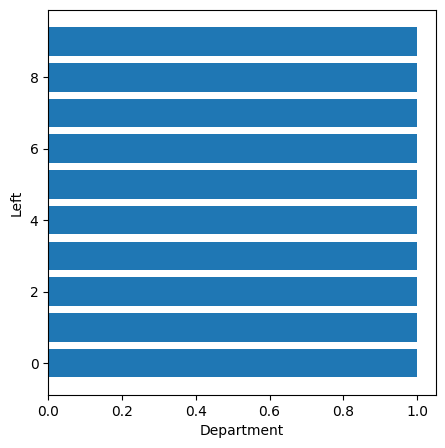

In [ ]:
dept = data['Department']
left_who_left = data['left']

fig = plt.figure(figsize=(5,5))
plt.barh(dept,left_who_left)
plt.xlabel('Department')
plt.ylabel('Left')
plt.show()